[(425, 2010), (519, 2011), (547, 2012), (619, 2013), (661, 2014), (636, 2015), (610, 2016), (610, 2017), (610, 2018), (566, 2019), (539, 2020)]


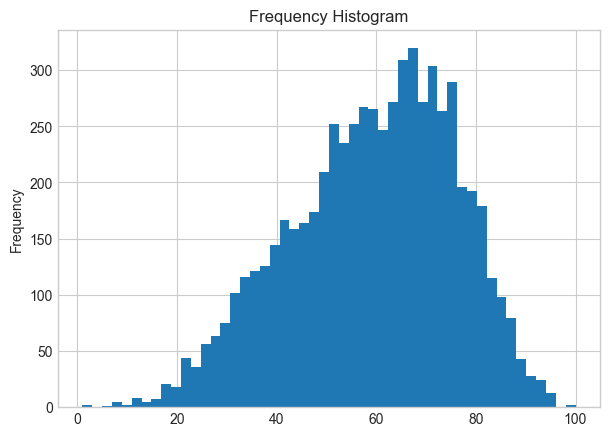

In [10]:
import json
# open username and password from another file.
with open('C:\\Users\\xianx\\Documents\\xianw_secret.json') as f:
      data = json.load(f)
      username = data['username']
      password = data['password']
#print (username+" :" +password)

# import pyodbc
import pyodbc
# setup connection to SQLserver, with specific credentials
connection=pyodbc.connect("DRIVER={SQL Server};"
                          "SERVER=LAPTOP-8VUQJOSL;"
                          "DATABASE=python_movies;"
                          "Trusted_Connection=Yes;"
                          "UID="+username+";"
                          "PWD="+password)
cursor=connection.cursor()
sql="SELECT COUNT(1) AS NumberOfMovies,YEAR(ReleaseDate) as ReleaseYear from [dbo].[MetacriticMovies] Group by YEAR(ReleaseDate) order by year(ReleaseDate)"
cursor.execute(sql)
rows=cursor.fetchall()
print(rows)

# import library
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#metaplotlib hitogram
#import numpy as np

for row in rows:
    plt.plot(row[1],row[0],'o')
# add lables
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Count of Movies')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

cursor.execute('select Score from [dbo].[MetacriticMovies]')
score=cursor.fetchall()
# Plot Histogram on x
plt.hist(score, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
